In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
%cd /content/drive/MyDrive/churn_prediction

/content/drive/MyDrive/churn_prediction


## **LOAD FILE**

In [166]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style = 'white')

# Input data files are available in the "../churn_prediction" directory.

import os
print(os.listdir("../churn_prediction"))

# Any results we write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv', 'kde.png', 'kde4.png', 'inp.png', 'par.png']


In [167]:
# loading dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [169]:
df.shape

(7043, 21)

## **DATA CLEANING**

In [170]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Passed a dictionary to astype() function  
df = df.astype({"customerID":'category',
                "gender":'category',
                "SeniorCitizen":'category',
                "Partner":'category',
                "Dependents":'category',
                "tenure":'float64',
                "PhoneService":'category',
                "MultipleLines":'category',
                "InternetService":'category',
                "OnlineSecurity":'category',
                "OnlineBackup":'category',
                "DeviceProtection":'category',
                "TechSupport":'category',
                "StreamingTV":'category',
                "StreamingMovies":'category',
                "Contract":'category',
                "PaperlessBilling":'category',
                "PaymentMethod":'category',
                "MonthlyCharges": 'float64',
                #"TotalCharges": 'float64'
               }) 

In [171]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Attributes Information
Prediction column:

Churn : Whether the customer churned or not (Yes or No)
Two numerical columns:

1. MonthlyCharges : The amount charged to the customer monthly

2. TotalCharges : The total amount charged to the customer
Eighteen categorical columns: 1. customerID : Customer ID unique for each customer

2. gender : Whether the customer is a male or a female

3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

4. Partner : Whether the customer has a partner or not (Yes, No)

5. Dependents : Whether the customer has dependents or not (Yes, No)

6. Tenure : Number of months the customer has stayed with the company

7. PhoneService : Whether the customer has a phone service or not (Yes, No)

8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

16. Contract : The contract term of the customer (Month-to-month, One year, Two year)

17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) **bold text** **bold text**

In [172]:
# Checking if it contain null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [173]:
# Percentage of null values
df.isnull().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [174]:
# fill missing values with mean column values
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

## **EXPLORATORY DATA ANALYSIS**

In [175]:
#CLASS DISTRIBUTION
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

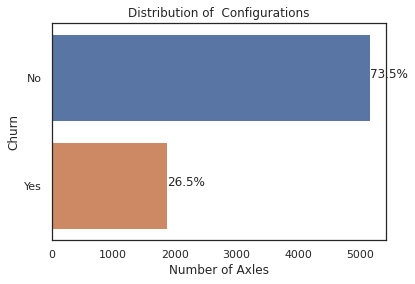

In [176]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

# **NUMERICAL FEATURES USING 3 COLUMNS : TENURE, MONTHLY CHARGES, AND TOTAL CHARGES.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

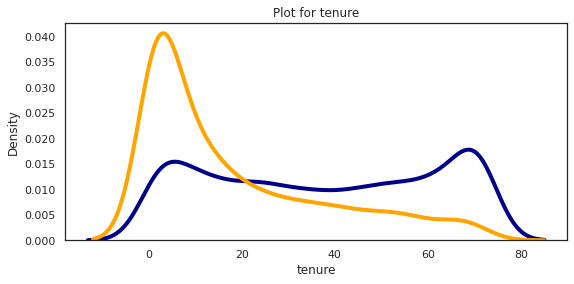

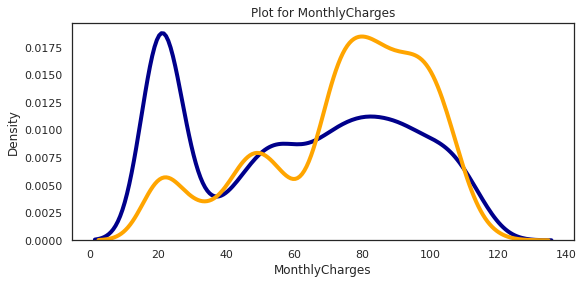

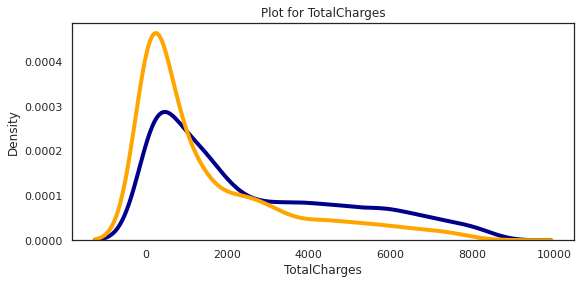

In [177]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
kdeplot('tenure', hist = False, kde = True)
kdeplot('MonthlyCharges', hist = False, kde = True)
kdeplot('TotalCharges', hist = False, kde = True)

From the plot we can conclude that:

*   Recent Users are more likely to churn
*   Users with higher Monthly Charges are also more likely to churn
*   Total charges have similiar property for both

**HISTOGRAM**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


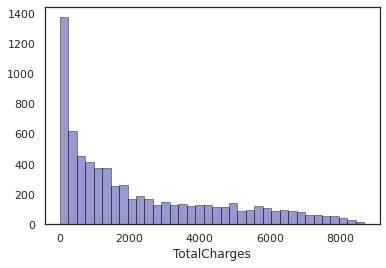

In [178]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['TotalCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


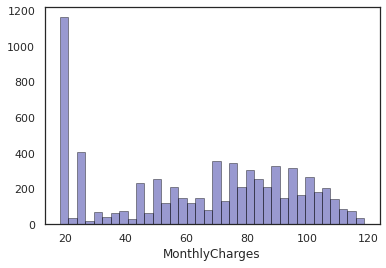

In [179]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['MonthlyCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


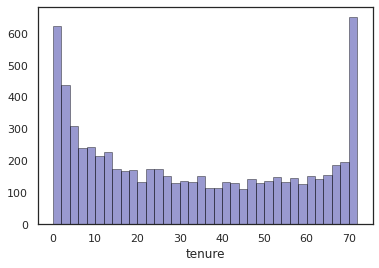

In [180]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

**Pairplot**

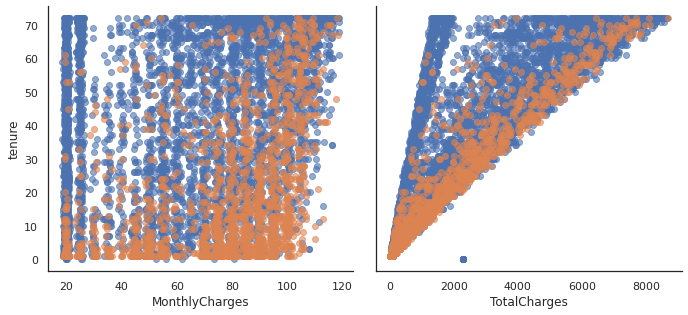

In [181]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

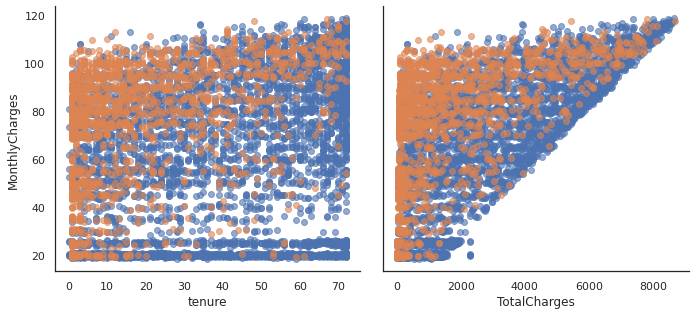

In [182]:
g = sns.PairGrid(df, y_vars=["MonthlyCharges"], x_vars=["tenure", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

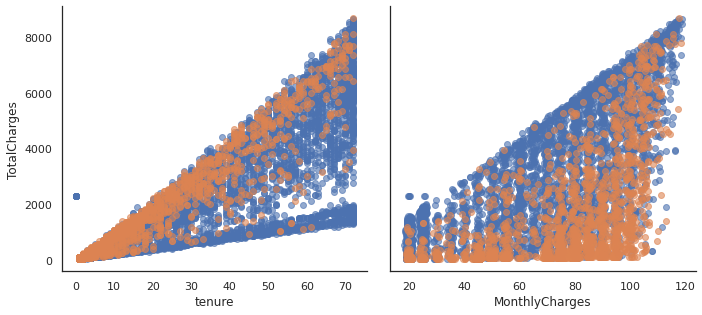

In [183]:
g = sns.PairGrid(df, y_vars=["TotalCharges"], x_vars=["tenure", "MonthlyCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

**Feature Generation** that can be done by the difference between the monthly charges and the total charges divided by the tenure below:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


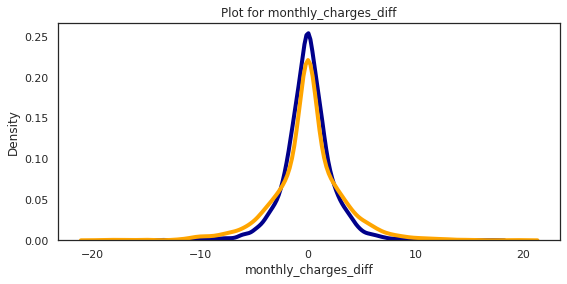

In [184]:
# Calculate features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff', kde = True, hist = False)
plt.savefig('kde4.png')

# **Categorical Features**

This dataset has 16 categorical features:


*   Six binary features (Yes/No)
*   Nine features with three unique values each (categories)
*   One feature with four unique values




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


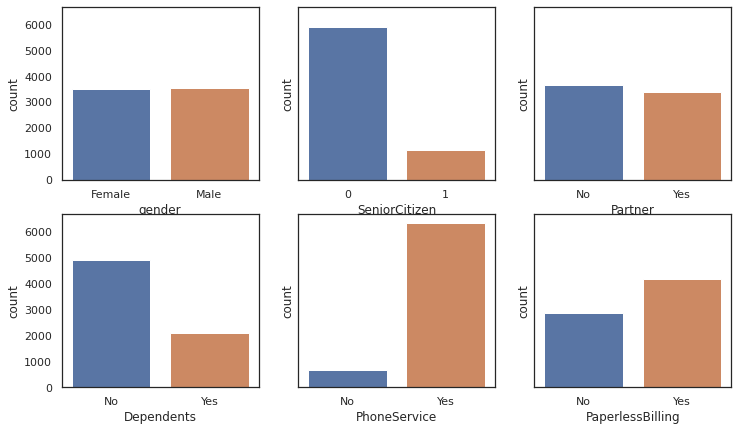

In [185]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])
fig.savefig("inp.png")

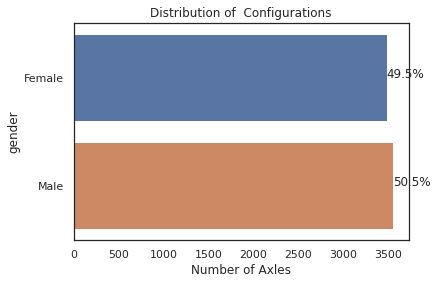

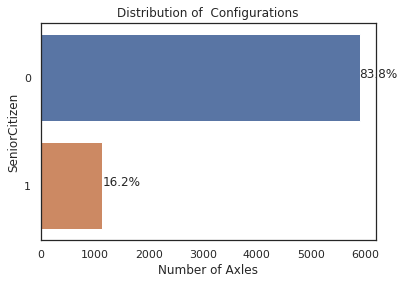

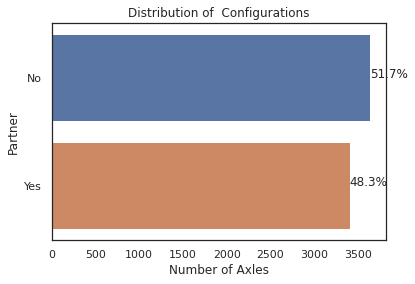

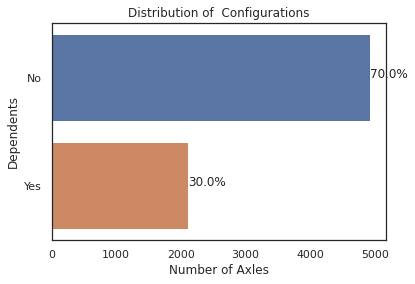

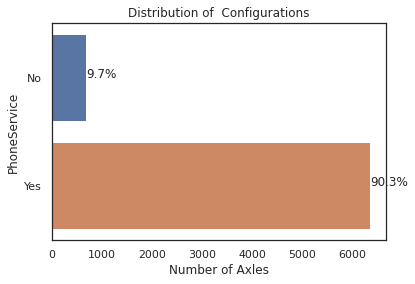

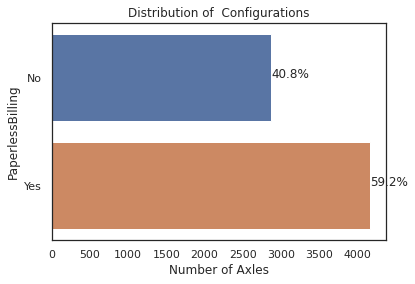

In [186]:
bar_plot(df, "gender")
bar_plot(df, "SeniorCitizen")
bar_plot(df, "Partner")
bar_plot(df, "Dependents")
bar_plot(df, "PhoneService")
bar_plot(df, "PaperlessBilling")

# **Partner and Dependets**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


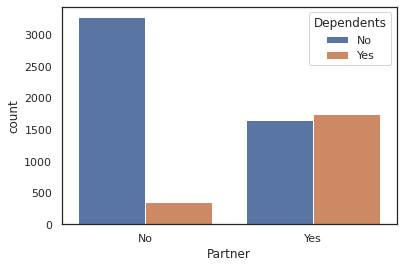

In [187]:
sns.countplot("Partner", data=df, hue = 'Dependents')

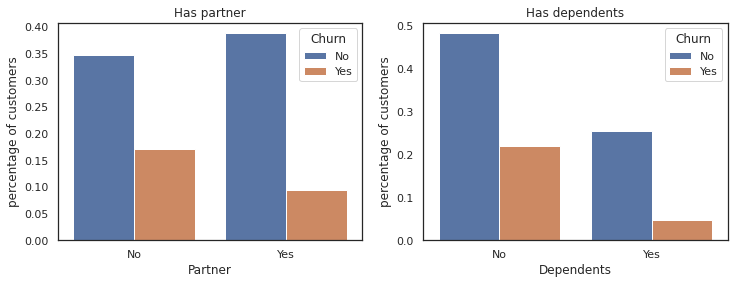

In [188]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
#plot PArtner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x="Partner", y=axis_y, hue='Churn', data=gp_partner, ax=axis[0])
#Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
fig.savefig('par.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


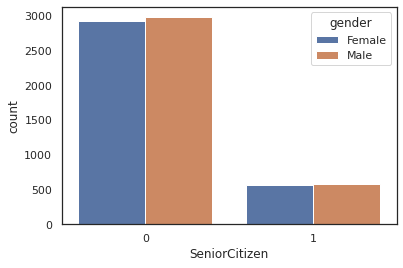

In [189]:
sns.countplot("SeniorCitizen", data=df, hue = 'gender')

# **Senior Citizen and Dependent**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


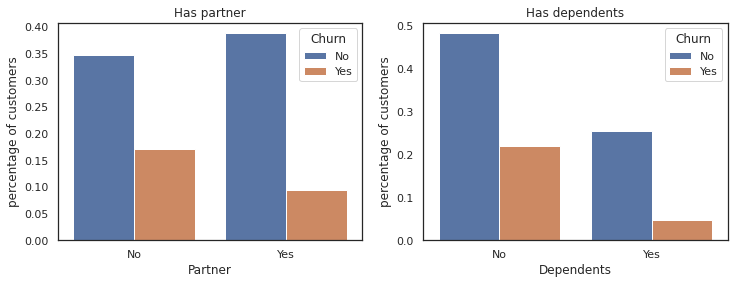

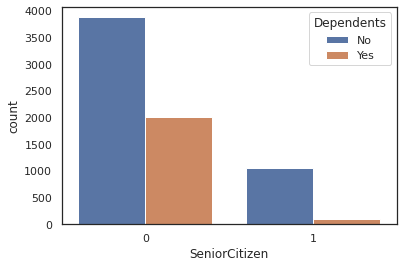

In [190]:
sns.countplot("SeniorCitizen", data=df, hue = 'Dependents')
fig

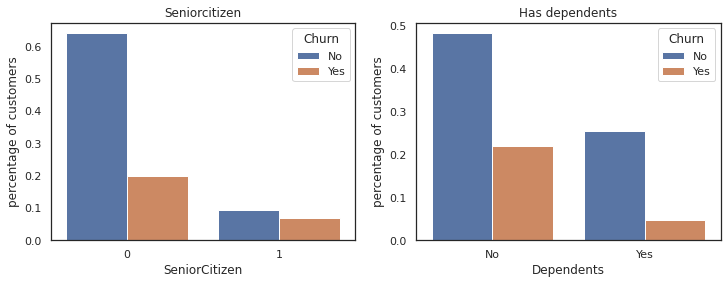

In [191]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Seniorcitizen")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
#Plot Partner Column
gp_partner = df.groupby('SeniorCitizen')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SeniorCitizen', y=axis_y, hue='Churn', data=gp_partner, ax=axis[0])
#plot Dependents Column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y=axis_y, hue='Churn', data=gp_dep, ax=axis[1])
fig.savefig('par.png')

# **Phone and Internet Services**

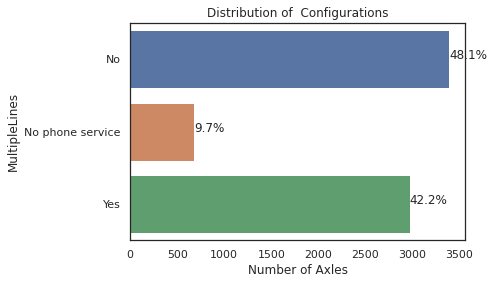

In [192]:
bar_plot(df, "MultipleLines")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


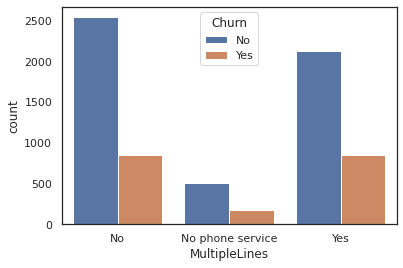

In [193]:
sns.countplot("MultipleLines", data=df, hue='Churn')


*   Few Customers doesn't have phone service
*   Customers with multiple lines have a slightly higher churn rate



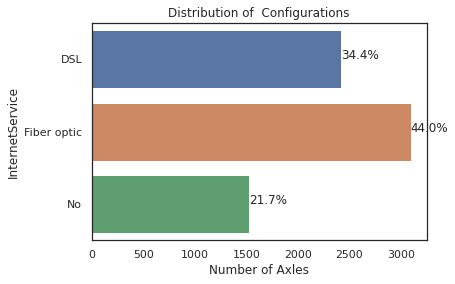

In [194]:
bar_plot(df, "InternetService")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


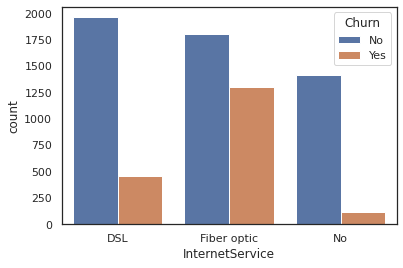

In [195]:
sns.countplot("InternetService", data=df, hue = 'Churn')



*   Customers without internet have a very low churn rate
*   Customers with fiber are ore probable to churn than those with DSL connection



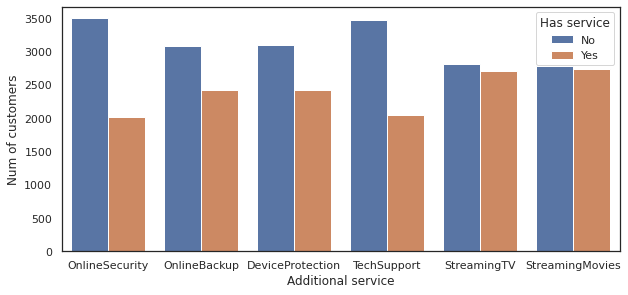

In [196]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': "Has service"}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

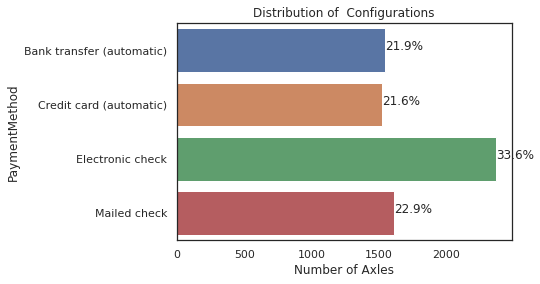

In [197]:
bar_plot(df, "PaymentMethod")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


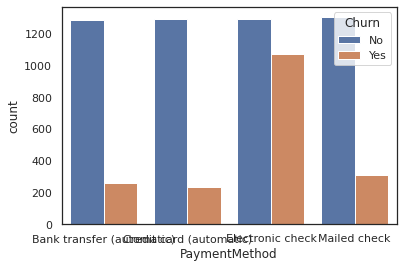

In [198]:
sns.countplot("PaymentMethod", data=df, hue='Churn')

# **Correlation between features**

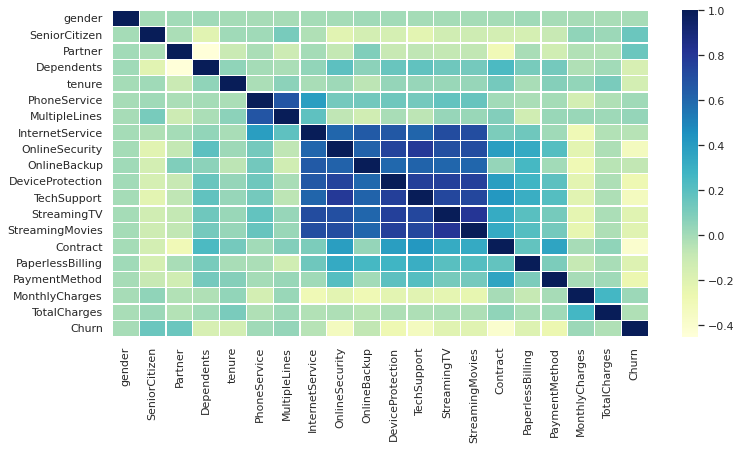

In [199]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'],
        axis=1, inplace=True)
df_corr = df.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr(), xticklabels=df_corr.columns, yticklabels=df_corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

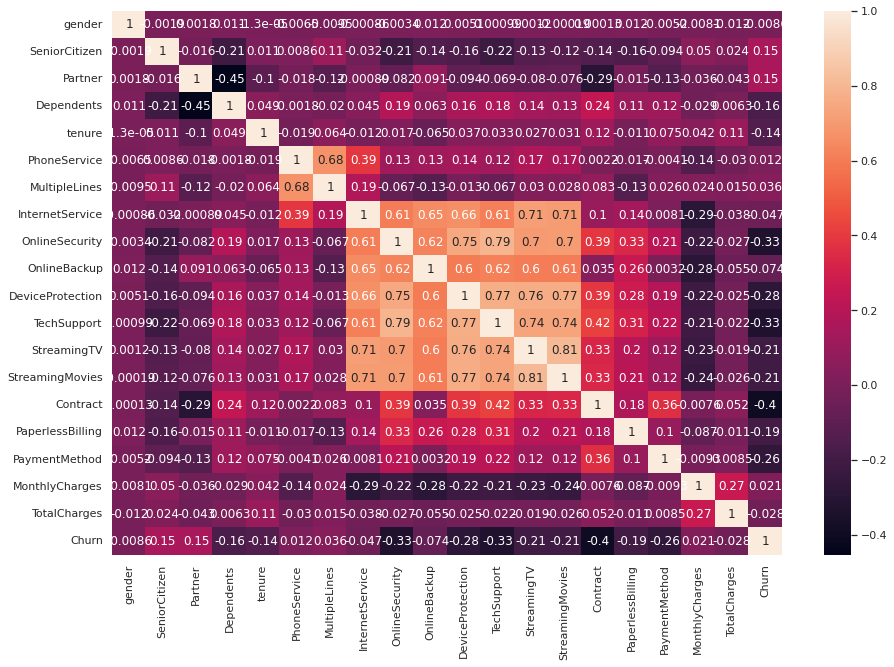

In [200]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

# **Feature Importance**

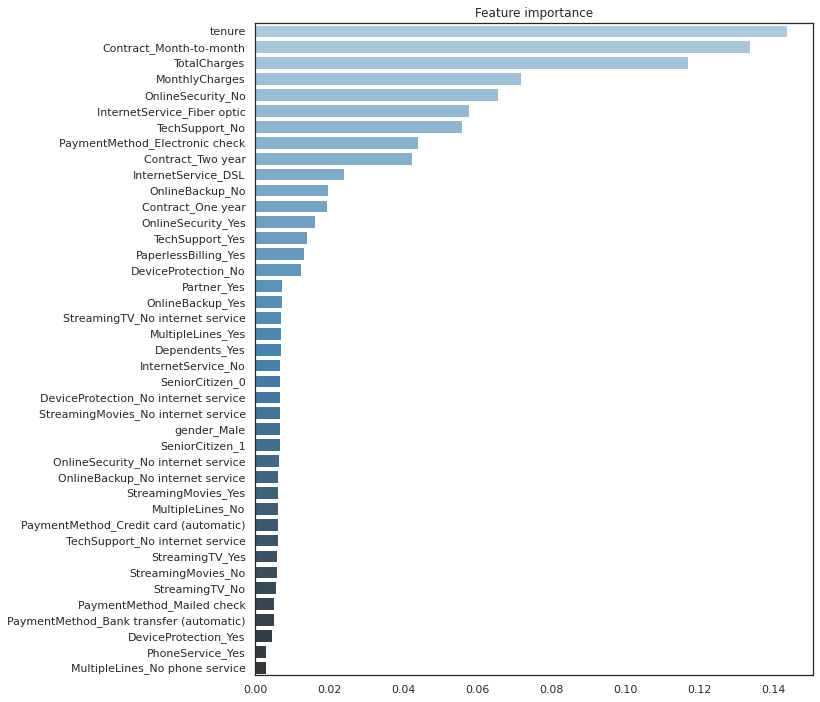

In [205]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
#one-Hot encode
df = pd.get_dummies(df)
#Drop redundants columns(for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop, axis=1), df['Churn_Yes']
#Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
#Plot features importances
imp = pd.Series(data = clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

# **Oversampling Technique**

Synthetic Minority Oversampling Technique(SMOTE) is an oversampling technique and widely used to handle the imbalanced dataset. This technique synthesizes new data points for minority class and oversample the class.

In [206]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

In [207]:
y_resampled.value_counts()

0    5174
1    5174
Name: Churn_Yes, dtype: int64

# **Train Test Splits**
Divides data into train and test subset

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

# **Model**
For starter GradientBoostingclassifier model is implemented to show to results of basic model and its predictions.

In [209]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)

GradientBoostingClassifier()

Below is Model prediction on Training dataset

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

Below is Model prediction in testing dataset

In [210]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8560386473429952

# **Confusion Martrix**

In [212]:
#confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#actual values
actual = y_test
# predicted values
predicted = pred_test

#confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[1,0])
print('Confusion matrix: \n', matrix)

#outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

#classification report for precision, recall, f1-score and accuracy
matrix = classification_report(actual, predicted, labels=[1,0])
print('classification report : \n',matrix)

Confusion matrix: 
 [[907 142]
 [156 865]]
classification report : 
               precision    recall  f1-score   support

           1       0.85      0.86      0.86      1049
           0       0.86      0.85      0.85      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



# **Evaluation**

In [213]:
y_true = y_test
y_pred = pred_test
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[865, 156],
       [142, 907]])

In [214]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8560386473429952

In [215]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([0.84720862, 0.86463298])

In [217]:
#precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.85898709, 0.85324553])

In [218]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None)

array([0.8530572 , 0.85890152])